# Theoretical Neuroscience (Dayan and Abbott) Ch. 1

# Exercises

### 1) ISI histogram for simulated Poisson process

cv:  1.0096533974637414
fano factor:  0.9518588709677418


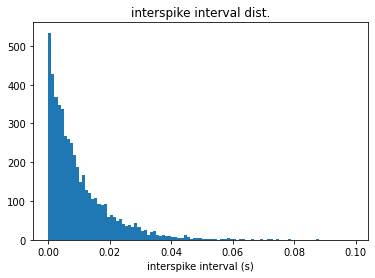

In [2]:
from matplotlib import pyplot as plt
import numpy as np

T = 50
#dt = .01
t = 0
r = 100

# get times for Poisson spikes
spikes = []
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r # current isi
    t += i
    if t < T:
        spikes.append(t)
    isi.append(i)

# coefficient of variation (should be around 1)
isi_std = np.std(isi)
isi_mean = np.mean(isi)
cv = isi_std/isi_mean
print('cv: ', cv)

# fano factor for spike counts obtained over count intervals of length t
spike_counts = []
for i in range(1000):
    t = .0200 # count interval of 20ms
    # get random counts within an interval of length t
    x = np.random.randint(0, len(isi)) # starting index
    count = 0
    val0 = isi[np.random.randint(0, len(isi))]
    val = 0
    while (val < val0 + t) and (x < len(isi)):
        val += isi[x]
        x += 1
        count += 1
    spike_counts.append(count)

print('fano factor: ', (np.var(spike_counts)/np.mean(spike_counts)))

# plot isi histogram
plt.hist(isi, bins=np.arange(0,.1,.001))
plt.title('interspike interval dist.')
plt.xlabel('interspike interval (s)')
plt.show()


This looks like an exponential distribution, which is what it should be (see above section on isi distributions).

### 2) Adding refractory period

cv:  0.6688886374688036
fano factor:  0.44684641638225253


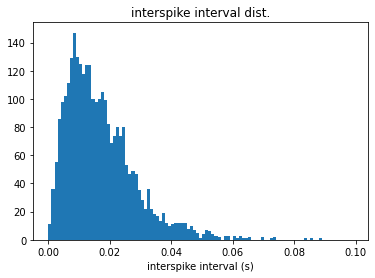

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

T = 50
#dt = .01
t = 0
r_max = 100

# get initial times for Poisson spikes
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        isi.append(i)

# spike thinning, with time constant tau (s) for recovery
new_isi = []
t = 0
tau = .010 # .001 to .020 (s)

for i in range(len(isi)):
    # get firing rate at the time of each spike (t=isi)
    t += isi[i]
    r = r_max*(1-np.exp(-1*t/tau))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_isi.append(t)
        t = 0

isi = new_isi

# cv
isi_std = np.std(isi)
isi_mean = np.mean(isi)
cv = isi_std/isi_mean
print('cv: ', cv)

# fano factor for spike counts obtained over 100ms intervals
spike_counts = []
for i in range(1000):
    t = .100 # (s)
    # get random counts within an interval of length t
    x = np.random.randint(0, len(isi)) # starting index
    count = 0
    val0 = isi[np.random.randint(0, len(isi))]
    val = 0
    while (val < val0 + t) and (x < len(isi)):
        val += isi[x]
        x += 1
        count += 1
    spike_counts.append(count)

print('fano factor: ', (np.var(spike_counts)/np.mean(spike_counts)))

# plot isi histogram
plt.hist(isi, bins=np.arange(0,.1,.001))
plt.title('interspike interval dist.')
plt.xlabel('interspike interval (s)')
plt.show()

There are fewer spikes that come immediately after another (extremely low ISIs are more infrequent than in the previous simulation), which suggests accurate data.

### 3) Autocorrelation histograms
similar to the isi histogram, but shows the distribution of times between any 2 spikes (not just consecutive spikes)

#### Constant firing rate: 100 Hz

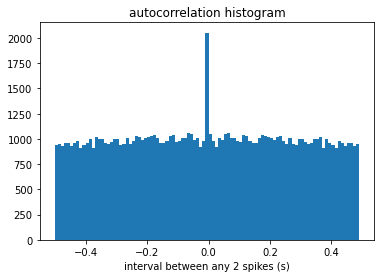

In [18]:
from matplotlib import pyplot as plt
import numpy as np

T = 10
#dt = .01
t = 0
r = 100

# get times for Poisson spikes
spikes = []
times = [] # autocorrelation, all possible intervals
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r # current isi
    t += i
    if t < T:
        spikes.append(t)

# autocorrelation
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
plt.hist(times, bins=np.arange(-.5,.5,.01))
plt.title('autocorrelation histogram')
plt.xlabel('interval between any 2 spikes (s)')
plt.show()

All intervals have roughly the same probability, as expected from a Poisson distribution. Spike at 0.0 to 2000 is twice the average value of 1000 because the interval between each spike and itself was counted twice.

#### Constant firing rate with refractory period

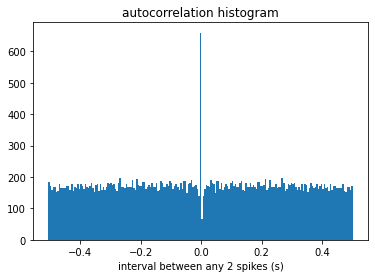

In [23]:
from matplotlib import pyplot as plt
import numpy as np

T = 10
#dt = .01
t = 0
r_max = 100

# get initial times for Poisson spikes
isi = []
while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        isi.append(i)

# spike thinning, with time constant tau (s) for recovery
new_isi = []
spikes = []
t = 0
tau = .010 # .001 to .020 (s)

for i in range(len(isi)):
    # get firing rate at the time of each spike (t=isi)
    t += isi[i]
    r = r_max*(1-np.exp(-1*t/tau))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_isi.append(t)
        t = 0

isi = new_isi
t = 0
for i in isi:
    t += i
    spikes.append(t)

# autocorrelation
times = []
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
plt.hist(times, bins=np.arange(-.505,.505,.005))
plt.title('autocorrelation histogram')
plt.xlabel('interval between any 2 spikes (s)')
plt.show()

Notice the drop in intervals around 0 due to the refractory period.

#### Variable firing rate $r(t)=100(1+\cos(2\pi t/25 \text{ ms})) \text{ Hz}$

$\omega = 2\pi / .025 = 2\pi f = 2\pi / T$

$T = .025$ s

$f = 40$ Hz, which is a gamma wave in the brain, and is a frequency of particular interest because it's linked to Alzheimer's treatment.

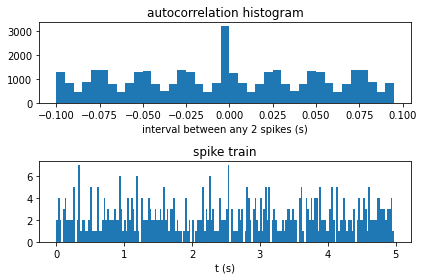

In [18]:
from matplotlib import pyplot as plt
import numpy as np

T = 20 # trial duration (s)

# get initial times for Poisson spikes
spikes = []
t = 0
r_max = 200

while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        spikes.append(t)

# spike thinning
new_spikes = []
for i in spikes:
    # time-dependent firing rate function r(t); (T=25 ms, A=100Hz)
    r = 100*(1+ np.cos(2*np.pi*i/.025))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_spikes.append(i)

spikes = new_spikes

# autocorrelation
times = []
for i in spikes:
    for j in spikes:
        times.append(j-i)

# plot autocorrelation histogram
fig, axs = plt.subplots(2)

axs[0].hist(times, bins=np.arange(-.1,.1,.005))
axs[0].set_title('autocorrelation histogram')
axs[0].set_xlabel('interval between any 2 spikes (s)')

axs[1].hist(spikes, bins=np.arange(0, 5, .025))
axs[1].set_title('spike train')
axs[1].set_xlabel('t (s)')
fig.tight_layout()
plt.show()

Period of 0.025 s (25 ms) is equal to the period of the cos wave in $r(t)$, so that's a sign that the histogram is accurate. Related to theta waves in brain, which have a frequency of 4-8 Hz.

### 4) Poisson spike train with $r(t)=100(1+\cos(2\pi t/300\text{ ms})) \text{ Hz}$

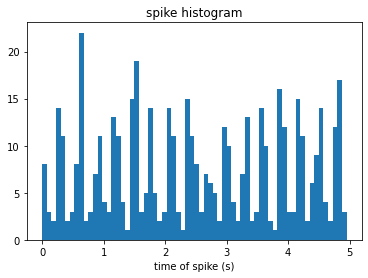

In [20]:
from matplotlib import pyplot as plt
import numpy as np

# 1) generate Poisson spike train with r(t) above

T = 20 # trial duration (s)

# get initial times for Poisson spikes
spikes = []
t = 0
r_max = 200

while t < T:
    x = np.random.uniform(0.0, 1.0)
    i = -1*np.log(x)/r_max # current isi
    t += i
    
    if t < T:
        spikes.append(t)

# spike thinning
new_spikes = []
for i in spikes:
    # time-dependent firing rate function r(t); (T=300 ms, A=100Hz)
    r = 100*(1+ np.cos(2*np.pi*i/.300))

    # prob. of keeping spike = r(t)/r_max
    if np.random.uniform(0.0, 1.0) < r/r_max:
        new_spikes.append(i)

spikes = new_spikes

# plot spike histogram
plt.hist(spikes, bins=np.arange(0, 5, .075))
plt.title('spike histogram')
plt.xlabel('time of spike (s)')
plt.show()

### 5) "Paradox" with constant rate Poisson process
Every sequence of N spikes occurring over a given time interval $T$ is equally likely, but we don't expect to see all N spikes appearing within the first 1% of the time interval. This isn't a paradox because if you restrict the spikes to be in the first 1% of the given time interval, you're changing the time interval being used to a smaller length, so the probability of N spikes in that smaller intervals is much lower. Getting any specific sequence of N spikes in T is just as unlikely as getting all N spikes in the first 1% of the interval, but the probability that the N spikes is in the first 80% of the interval (for example) is higher since the restricted interval is larger.

### 6) White-noise stimulus generator

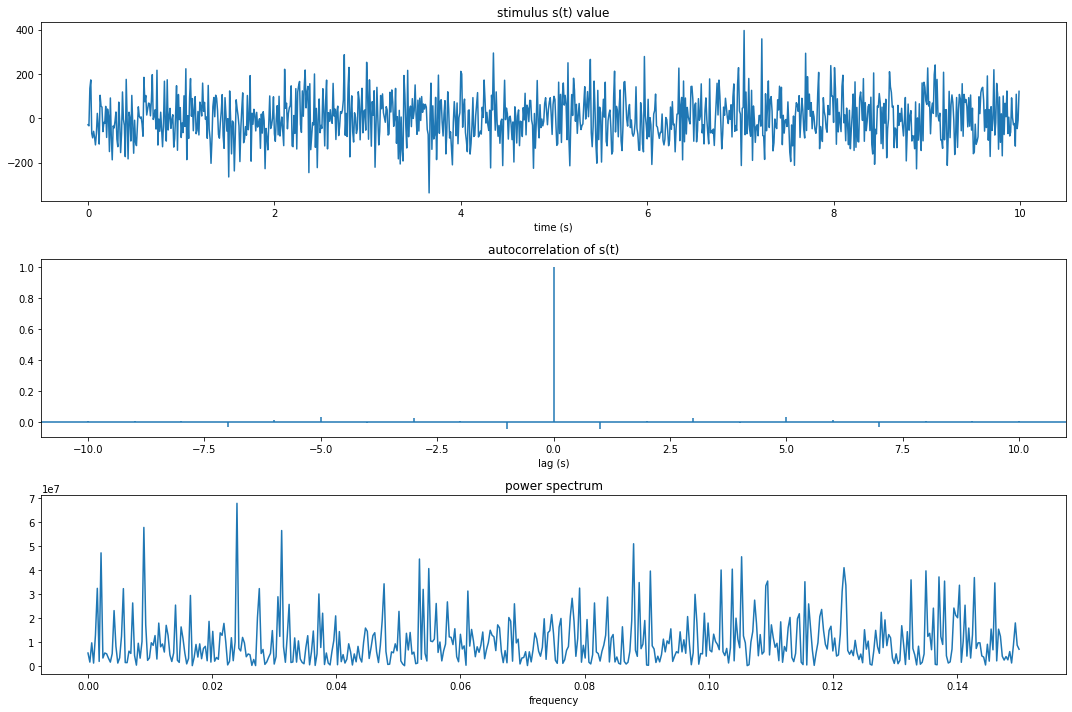

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Approx WN stimulus values from PD with mean=0, variance=a/dt
dt = .01 # (s)
a = 1 # from Q_{ss}(tau) = a*dirac(tau)
T = 10 # (s), total stimulus duration

fig, axs = plt.subplots(3, figsize=(15,10))

# plot WN stimulus
s = np.random.normal(loc=0, scale=(a/dt), size=(int(T/dt),))
t = np.arange(0.0, T, dt)

axs[0].plot(t, s)
axs[0].set_title('stimulus s(t) value')
axs[0].set_xlabel('time (s)')

# plot autocorrelation histogram
axs[1].acorr(s)
axs[1].set_title('autocorrelation of s(t)')
axs[1].set_xlabel('lag (s)')

# plot power spectrum of s(t)
fourier_transform = np.fft.rfft(s)
power_spectrum = np.square(np.abs(fourier_transform))
frequency = np.linspace(0, .3/2, len(power_spectrum))

axs[2].plot(frequency, power_spectrum)
axs[2].set_title('power spectrum')
axs[2].set_xlabel('frequency')

fig.tight_layout()
plt.show()

Stimulus looks like white noise, which is promising. Autocorrelation roughly looks the way it should be: 0 everywhere besides $x=0$, with a few small spikes on the graph bc the data isn't perfect. Power spectrum seems relatively stable, with a few spikes that probably relate to the same data imperfections that caused the small spikes in the autocorrelation graph, but it's still extremely flat considering the y-scale is 1e7.

Setting a different variance for the normal dist (a/50/dt instead of a/dt) leads to fluctuations in the power spectrum from 0 to 20000. So, this current variance value leads to a relatively much flatter power spectrum.

# Chapter 1 Notes
## The above exercises reference these concepts.

### Methods of quantifying firing rates

Spike (action potential) centered at time $t_1$: $f(t)=\delta (t-t_1)$

Uses Dirac $\delta$ function defined such that: $h(t)=\int_{t-a}^{t+a} d\tau\,\delta(t-\tau)\,h(\tau)$

From $h(t)=h(\tau)=n$, $\int_{-\infty}^\infty\,d\tau\,\delta(t-\tau)=1$.

#### Neural response function (spike train)

$\rho(t)=\sum_{i=1}^n\,\delta(t-t_i)$, for n spikes.
It follows that we can use the neural response function to turn discrete sums of functions over action potentials into integrals:

$$
\rho(t-\tau)=\sum_{i=1}^n\,\delta((t-\tau)-t_i)=\sum_{i=1}^n\,\delta((t-t_i)-\tau)\\
\sum_{i=1}^n\,h(t-t_i)=\int_{-\infty}^\infty h(\tau)d\tau\,\sum_{i=1}^n\,\delta((t-t_i)-\tau)
=\int_{-\infty}^\infty\,h(\tau)\rho(t-\tau)d\tau
$$

Because $\int_{-\infty}^\infty\,d\tau\,\delta(t-\tau)=1$, $\int_0^T\,d\tau\,\rho(\tau)=n$.

#### Spike count rate

$r=\frac{1}{T}\,\int_0^T\,d\tau\,\rho(\tau)=\frac{n}{T}$, which is the average rate $r$ of action potentials over the entire time interval T.

Benefit: can find a value with just a single trial.

Problem: loses all temporal variation during T; just accounts for number of spikes over T.

#### Time-dependent firing rate, or firing rate

Essentially just find the spike count rate over a smaller (theoretically infinitesimal) time interval $(t, t + \Delta t)$, which requires you to average over multiple trials for accurate r($t$) values.

$r(t)=\frac{1}{\Delta t}\,\int_t^{t+\Delta t}\,d\tau\,\langle\rho(\tau)\rangle$, where $\langle\rho(\tau)\rangle$ is the average value of the neural response function over n trials (the **trial average**).

$r(t)\Delta t$ is the average number of spikes in interval $(t, t+\Delta t)$ for a small $\Delta t$ (so that the r($t$) value is accurate enough). Since there's at most 1 spike per trial in this interval for small $\Delta t$, $r(t)\Delta t < 1$.

Therefore, $r(t)\Delta t$ is the probability of a spike in a small interval (duration $\Delta t$) around time t.

r($t$) is the trial-averaged density of spikes along the time axis, which is equivalent to $\langle\rho(t)\rangle$ when used in an integral:

$\int d\tau\,h(\tau)\,\langle\rho(t-\tau)\rangle=\int d\tau\,h(\tau)r(t-\tau)$

This is because if $\rho(t)$ makes a contribution to the integral whenever there's a spike, then for a large n, $\langle\rho(t)\rangle$ will make a contribution that's proportional to the fraction of trials on which a spike occured at every time $t$, so it acts as a trial-average spike density function, even though it's defined differently than r($t$) (discrete vs continuous).

#### Average firing rate

$\langle r\rangle=\frac{\langle n\rangle}{T}=\frac{1}{T}\int_0^T\,d\tau\langle\rho(\tau)\rangle=\frac{1}{T}\int_0^T\,dt\,r($t$)$.

From the equations, $\langle r\rangle$ can be interpreted as:
<ol>
    <li>average number of spikes per trial, n, divided by the trial duration T</li>
    <li>trial average of the spike-count rate $r$</li>
    <li>time average of r($t$) over the entire trial duration T</li>
</ol>

### Methods of measuring firing rate r(t)

![title](images/firing_rates.png)

<ol>
   <li> Discrete-time r(t) obtained by dividing the trial duration into bins of length $\Delta t$ and dividing the number of spikes in each bin by $\Delta t$.<br>
       Problem: bin placement is pre-defined arbitrarily, and breaking up certain intervals into different bins may lead to inaccurate r(t) values</li>
    <li> Sliding a window of length $\Delta t$ down the trial duration, and at each position $t$, dividing the number of spikes in the window by $\Delta t$. (solution to previous problem)
        $$r_{approx}(t)=\sum_{i=1}^n\,w(t-t_i)$$ <br>
        where $t_i$ is the time at which a spike occured, n is the total number of spikes in the trial duration.<br>
        $w(t)$ is the window function, or filter kernel:
        $$
            w(t)=
            \begin{cases}
                \frac{1}{\Delta t},&-\Delta t/2\leq t\leq\Delta t/2\\
                0,&\text{otherwise.}
            \end{cases}
        $$
        Linear filter: (integral form of above equation): $$r_{approx}(t)=\int_{-\infty}^\infty d\tau\,w(\tau)\rho(t-\tau)$$<br> by the sum to integral relation established in the "Neural response function" section.<br><br>
        Problem: rates obtained at times separated by less than $\Delta t$ are correlated because they involve some of the same spikes; graph still looks jagged due to discontinuous shape of $w$.</li>
    <li> To avoid the jagged graph shape, we can use any continuous filter kernel as long as its time integral is 1 (any probability density function; the initial definition of w(t) was a uniform density over $(t, t+\Delta t)$). Example: using a Gaussian
        $$w(\tau)=\frac{1}{\sqrt{2\pi}\sigma_w}\exp\left(-\frac{\tau^2}{2\sigma_w^2}\right)$$
        where $\sigma_w$ plays a role similar to $\Delta t$ by controlling the width of the normal distribution (the temporal resolution).<br>
        Problem: both rectangular and Gaussian window functions take into account spikes that occur after $t$, while neurons can only account for spikes before $t$, so the model must be inaccurate.<br></li>
    <li>
        Solution: use a causal window function (zero  when argument $(t-\tau)$ is negative) such as the $\alpha$ function
    $$w(\tau)=[\alpha^2\tau\exp(-\alpha\tau)]_+$$ where $1/\alpha$ determines temporal resolution, and $[z]_+$ is the half-wave rectification operation
        $$[z]_+=\begin{cases}
            z&\text{if } z\geq 0\\
            0&\text{otherwise.}
        \end{cases}$$
    Causal kernels lead to delays in r(t) peaks (compared with other methods of determining r(t)) because only data before $t$ is used (see figure).</li>
</ol>

### Tuning curves

Neural response tuning curve: $f(s)=\langle r\rangle$, which is the average firing rate over a large number of trials (average number of action potentials divided by trial duration). Frequency (spikes per sec, or Hz) as a function of stimulus $s$. Called a tuning curve because it shows what stimulus it encodes (most likely the $s$ value when $f$ peaks).
Stimulus $s$ could be the angle of light (visual neurons), angle of direction of motion (motor neurons), etc.
Given a stimulus, you can predict a neuron's average firing rate with the tuning curve.

#### Gaussian tuning curve
The best fit curve (Fig. B) is drawn assuming a normal distribution of the form:
$$f(s)=r_{\max}\exp\left(-\frac{1}{2}\left(\frac{s-s_{\max}}{\sigma_f}\right)^2\right)$$
where $s_{\max}$ is the mean (stimulus $s$ at which the curve peaks) and $r_{\max}$ is the max firing rate (the rate at $s_{\max}$).
The monkey's $s_{\max}$ is about $45˚$ and the cat neuron's $s_{\max}$ is $0˚$.
![title](images/cat-visual-tuning-curve.png)
Figure A shows spike train of a monkey's primary visual cortex (V1) neuron, based on the angle of a bar of light that moved across the neuron's receptive field. Plotting average firing rate vs angle (s) gives the tuning curve in Figure B, which is for a cat's neuron (not the monkey's neuron in Fig A).

#### Cosine tuning curve
A tuning curve of the form
$$f(s)=r_0+(r_{\max}-r_0)\cos(s-s_{\max})$$
more accurately fits the data.
Example: motor neuron firing rate for a monkey reaching in different directions.
![title](images/cosine-tuning-curve.png)

#### Sigmoidal (logistic) tuning curve
Example: V1 neuron that detects retinal disparity, which affects distance perception.
$$f(s)=\frac{r_{\max}}{1+\exp((s_{1/2}-s)/\Delta_s)}$$
where $s$ is the retinal disparity (see Fig A), $s_{1/2}$ is the disparity that produces a firing rate half as big as the max value $r_{\max}$ (see Fig B), and $\Delta_s$ controls how quickly $f$ increases as a function of $s$.
![title](images/sigmoidal-tuning-curve.png)
In Fig A, F is the fixation point of both eyes, and the gray lines show the location of an object some distance away from F, with some angle $s$ between the locations projected on the retinas.

### Noise
Noise: trial-by-trial deviation of $r$ from the average firing rate $f(s)$.

Additive noise: $\sigma$ of noise distribution is independent of $f(s)$.

Multiplicative noise: $\sigma$ of noise distribution is proportional to $f(s)$.


### Spike-triggered average (STA)

#### Defining stimulus function s(t)

1) define periodic time-dependent stimulus function s(t) about an average of 0 for convenience, so that for a trial of duration T:
$$
\int_0^Tdth(s(t+\tau))=\int_\tau^{T+\tau}dth(s(t))=\int_0^Tdth(s(t))
$$
and
$$
\int_0^Tdts(t)/T=0
$$

#### STA definition
Spike-triggered average stimulus $C(\tau)$: average value of a stimulus $\tau$ before a spike is fired.

$$
C(\tau)=\left\langle\frac{1}{n}\sum_{i=1}^ns(t_i-\tau)\right\rangle
\approx\frac{1}{\langle n\rangle}\left\langle\sum_{i=1}^ns(t_i-\tau)\right\rangle
$$
because the number of spikes in a trial is approximately equal to the average number of spikes per trial ($n\approx\langle n\rangle$) if $n$ is really large (which sort of makes sense).
Using the summation to integral equations from earlier:
$$
C(\tau) - \frac{1}{\langle n\rangle}\int_0^Tdt\langle\rho(t)\rangle s(t-\tau)=\frac{1}{\langle n\rangle}\int_0^Tdtr(t)s(t-\tau)
$$
![title](images/sta.png)

#### Multiple STAs

### Correlation functions

#### Firing-rate stimulus correlation function $Q_{rs}$
Correlation between firing rate at time $t$ and stimulus at time $t+\tau$:

$$
Q_{rs}(\tau)=\frac{1}{T}\int_0^Tdt\,r(t)s(t+\tau)
$$

so there would be a high correlation value if $r(t)$ was high when $s(t+\tau)$ was high and if $r(t)$ was low when $s(t+\tau)$ was negative.

#### Reverse correlation function (STA)
$$
C(\tau)=\frac{1}{\langle r\rangle}Q_{rs}(-\tau)
$$

Spike-triggered average stimulus is proportional to the correlation of the firing rate with the stimulus at previous times ($\tau$ goes in reverse to get the graph of $C(\tau)$).

#### Stimulus autocorrelation function $Q_{ss}$ (and white-noise stimuli)
Choosing a stimulus function that will give an accurate STA value with one trial: all values of the stimulus should be uncorrelated with values at any other time.

$$
Q_{ss}(\tau)=\frac{1}{T}\int_0^Tdt\,s(t)s(t+\tau)
$$

is the correlation function between the stimulus at one time $t$ and the stimulus at a future time $t+\tau$; you want the function to be as close to zero as possible.

For a white noise stimulus, $s(t)s(t+\tau)=0$ on an interval of duration T (remember that the stimulus function was defined to be periodic with period T, which is also the duration of the trial), except when $\tau=0$ (bc the correlation of a value with itself is not going to be $0$). It's clear from this definition that:

$$
Q_{ss}(\tau)=\sigma_s^2\delta(\tau)
$$

because the delta function allows $Q_{ss}(\tau)=0$ at all points $\tau\neq0$, and $\sigma_s^2$ allows you to control the "magnitude of variability of the white noise" $\rightarrow$ You can generate these values from a normal distribution (see mean and variance requirements below), so $\sigma_s^2$ helps determine the variance of the normal distribution you use.

***Why is the equation above equal to the statement that white noise has equal power at all frequencies? (flat power spectrum)***

**Power spectrum**: How much of the signal is at a given frequency $\omega$?
1) Fourier transform $\hat{f}(\omega)$ of $f(t)$ shows the relative intensities ("power") of the sinusoidal waves that $f(t)$ can be decomposed into.
2) If $f(t)$ has a "flat" power spectrum then $f(t)$ is made of equal parts of all sinusoidal frequencies (it isn't biased toward one frequency). 
3) Power is generally proportional to signal squared (ex. if measuring an analog voltage V, $P\propto V^2$), so **power spectral density** of stimulus $f(t)$ is defined (assuming signal is defined for all times until infinity) as:

$$
S_{ff}(\omega)=\lim_{T\rightarrow\infty}\frac{1}{T} | \hat{f}(\omega) | ^2
$$

so that integrating $S_{ff}(\omega)d\omega$ gives us average power:

$$
P=\lim_{T\rightarrow\infty}\frac{1}{T}\int_{-\infty}^{\infty} | \hat{f}(\omega) | ^2d\omega
$$

so that average power is a sum of the power at each time (squared signal) divided by the total time $T$.

4) The square in the above integral, $| \hat{f}(\omega) | ^2$, can be shown to also be the Fourier transform of the time convolution of the stimulus, which is related to autocorrelation. $\rightarrow$ power spectral density of $f(t)$ is the Fourier transform of the autocorrelation function of $f(t)$.

5) It would follow that if the autocorrelation function of $s(t)$, $Q_{ss}$, is 0 everywhere (except at $t=0$)

For an approximation of white-noise, choose a discrete stimulus function such that:

$$
\frac{1}{M}\sum_{m=1}^Ms_ms_{m+p}=
\begin{cases}
    \sigma_s^2/\Delta t &&\text{if } p=0\\
    0 &&\text{otherwise.}
\end{cases}
$$

so that it meets the $Q_{ss}$ requirement. Note that we split the trial duration T into $m$ time bins where the stimulus is constant in each bin, so $M\Delta t=T$.
See the momentum/force example of using the delta function to see why the $\sigma_s^2/\Delta t$ produces the $\sigma_s^2\delta(t)$ in the $Q_{ss}$ equation as $\Delta t\rightarrow0$.


Generating approximate white noise stimulus values: choose each $s_m$ independently from a probability dist. with $\mu=0$ and $\sigma^2=\sigma_s^2/\Delta t$. Note that higher variance is necessary for smaller $\Delta t$ (more time bins requires more variance for zero correlation between values). ***Why is this variance necessary?***
Ex: Gaussian white noise: probability dist. used is a Gaussian dist.

##### Why can't a physical system be designed to generate noise that is white (equal power) to arbitrarily high frequencies?
Constant stimulus value for the duration of each bin $\Delta t$ implies that, if white noise is a superposition of waves of many different frequncies at equal power, it can only contain waves with a period of $2\Delta t$ or higher (corresponding to 2 time bins, like the crest and trough of a single wavelength), so the max frequency for which the noise generated has a flat power spectrum is $1/(2\Delta t)$.
It doesn't seem like you can find a continuous white noise function, since you have to start with the autocorrelation function and work backwards.

#### Spike-train autocorrelation function $Q_{\rho\rho}$
Autocorrelation (actually autocovariance bc average is subtracted out) of neural response function $\rho(t)$, which shows the distribution of times between any 2 spikes in the train bc if $Q_{pp}(\tau)$ is high for some $\tau$, then it's more likely that there's an interspike interval of length $\tau$ between any two spikes; characterizes oscillation behavior of neuron (see diagram)

$$
Q_{\rho\rho}(\tau)=\frac{1}{T}\int_0^Tdt\,\langle(\rho(t)-\langle r\rangle)(\rho(t+\tau)-\langle r\rangle)\rangle
$$

***For a Poisson spike train generated at constant rate $r$, derive: ***
$$
Q_{\rho\rho}(\tau)=r\delta(\tau)=Q_{\rho\rho}(-\tau)
$$

Average of $\rho(\tau)$, which is $\langle r\rangle$, is subtracted from $\rho(\tau)$

#### Cross-correlation function
Instead of spike-train autocorrelation, calculating a similar cross-correlation function to find the distribution of intervals between pairs of spikes (one from each train: $\rho_1(t)$ and $\rho_2(t+\tau)$), can show whether two neurons fire in phase with each other.

Ex: peak at $\tau=0$ means the two neurons fire simultaneously (see diagram)

![title](images/spike-train-correlation.png)

### Poisson processes

**point process:** a stochastic process (spectrum of random variables on a probability space) that generates a sequence of events, like action potentials

**renewal process:** time intervals between events are independent, but events might be statistically dependent on previous events (not the intervals between those successive events).

**Poisson process:** no dependence at all on preceding events

We're assuming that spikes follow a Poisson distribution, which is the limit of the binomial distribution as $n\rightarrow\infty$. This is a reasonable model bc while we know the average firing rate during the trial (bc we can count the number of spikes in some amount of time), the probability of a spike at a specific time $t_i$ is essentially random (like a coin flip). So, the action potentials are like coin flips, with the limit of smaller time bins being equivalent to the limit of an infinite number of coins.

### Homogeneous Poisson processes: constant $r(t)$ over time
Poisson distribution: $\text{Poisson}(\lambda)=\frac{\lambda^n}{n!}e^{-\lambda}=$ probability of $n$ spikes occuring over some duration t, if $\lambda$ spikes per duration t occur on average. For a spike train with constant firing rate $r$, $rT$ spikes per duration T occur on average, so the probability of n spikes in a trial is:

$$
P_T[n]=\frac{(rT)^n}{n!}\exp{(-rT)}
$$

Variance and mean of Poisson dist. are $\lambda$, so $\sigma_n^2=rT=\langle n\rangle$ in this case, for any given value of $n$.

**Fano factor:** variance-to-mean ratio of a random process, used to measure the reliability with which the random variable could be estimated from a trial that contains several random events (noise-to-signal ratio)
$$
F=\frac{\sigma_n^2}{\langle n\rangle}=1 \text{ for homogeneous Poisson processes}
$$

where $\sigma_n^2$ is the variance of the probability distribution representing the likelihood of $n$ spikes ($n$ is on the x-axis of the probability dist. graph).

**Interspike interval distribution**: probability density of time intervals between adjacent spikes

Probability of a time interval $\tau$, such that after a spike at $t_i$, the next spike occurs in the interval $t_i+\tau\leq t_{i+1}<t_i+\tau+\Delta t$ ($\Delta t\rightarrow0$) = probability of no spike for time $\tau$ ($n=0$ for Poisson dist.) times probability $r\Delta t$ of a spike in that small time interval $\Delta t$ after $\tau$ (we use time bins bc the probability of a spike exactly at $\tau$ is 0).

$$
P[t_i+\tau\leq t_{i+1}<t_i+\tau+\Delta t]=r\Delta t\exp{(-r\tau)}
$$

so the probability distribution is exponential (higher probability of shorter time intervals):

$$
p[\tau\leq t_{i+1}-t_i<\tau+\Delta t]=r\exp(-r\tau)
$$

For exponential dist. $f(x)=\lambda\exp{(-\lambda x)}$ for $x\geq0$, $\mu=1/\lambda$ and $\sigma^2=1/\lambda^2$, so the mean and variance of the interspike interval are:

$$
\langle \tau\rangle=\frac{1}{r},\quad \sigma_\tau^2=\frac{1}{r^2}
$$

**Coefficient of variation**: ratio of standard deviation to mean (of the probability distribution used to generate spikes)

$$
C_V=\frac{\sigma_\tau}{\langle\tau\rangle}=1 \text{ for homogeneous Poisson processes}
$$

where $\sigma_\tau$ is the std of the interspike interval (isi) probability distribution (*not* the same dist. that's used to find the Fano factor). This is obvious from the above equations.

### Inhomogeneous Poisson processes: time-dependendent $r(t)$

The probability for generating a specific spike train of $n$ action potentials (with the ith spike at $t_i$) in a *homogeneous* Poisson process is:

$$
P[t_1,...,t_n]=n!P_T[n]\left(\frac{\Delta t}{T}\right)^m=(rT)^ne^{-rT}
$$

For an inhomogeneous process ($r(t)$ changes with time), you essentially multiply a lot of tiny homogeneous Poisson process probabilities together:

$$
p[t_1,...,t_n]=\exp{\left(-\int_0^Tdt\,r(t)\right)}\prod_{i=1}^nr(t_i)
$$

So $dt\,r(t)$ plays the role of $rT$ in the $\exp$ part, and the product of $r(t_i)$ is like the $(rT)^n$ because the rate $r(t_i)$ will be the average rate at the time of the ith spike, and you divide out T to go from probability to a probability distribution.

### Poisson spike generator

From earlier: $r(t)\Delta t$ is the average number of spikes in the short interval $\Delta t$, which is less than 1 if $\Delta t$ is small enough, so it represents the fraction of trials in which there was a spike in that small time bin $\Delta t$ (i.e. the probability of firing a spike during $\Delta t$).

#### Method 1: Generating spikes directly
Simulating a Poisson process with estimated firing rate $r_{est}(t)$: proceed through time in intervals of $\Delta t$, probability of generating a spike at time $t_i$ should be $r_{est}(t_i)\Delta t$. Generate some $x_\text{rand}$ with a uniform dist. and depending on that value, decide whether to have a spike or not.

#### Method 2: Generating the intervals between spikes (constant firing rate)
For constant firing rate $r$, you can use the interspike interval distribution, where the probability of an interval of duration $\tau$ is:

$$
P[t_i+\tau\leq t_{i+1}<t_i+\tau+\Delta t]=r\Delta t\exp{(-r\tau)}
$$

If you generate $x_{\text{rand}}$ with a uniform dist. (in a program), you can map $x_{\text{rand}}$ to an exponential dist. with $-\ln(x_{\text{rand}})$, which is clear from a graph. So, to generate a $\tau$ in compliance with the above equation:

$$
r\tau = -\ln(x_{\text{rand}})\\
t_{i+1}=t_i-\frac{\ln(x_\text{rand})}{r}
$$

#### Method 2 (with spike thinning/rejection sampling): time-dependent firing rate
1) Find some upper bound firing rate $r_\max$ such that $r_\text{est}(t)\leq  r_\max$.

2) Generate spikes with Method 2 for the constant firing rate $r_\max$.

3) For each spike at time $t_i$, the probability that you keep the spike should be $r_\text{est}(t_i)/r_\max$, so if you generate an $x_\text{rand}$ with a uniform dist. such that $r_\text{est}(t_i)/r_\max < x_\text{rand}$, remove the spike.

#### Estimating the firing rate
1) Decide on your stimulus function (ex. incrementing the stimulus by some constant value in set intervals, white noise).

2) Use the values from your experimentally derived tuning curve (see the earlier section about tuning curves). For the Gaussian tuning curve of the V1 (visual) neuron from earlier:

$$
r_\text{est}(t)=f(s(t))=r_\max\exp\left(-\frac{1}{2}\left(\frac{s(t)-s_\max}{\sigma_f}^2 \right) \right)
$$

3) Generate spikes by simulating a Poisson process with one of the above methods.

Example of that V1 neuron:
![title](images/v1-neuron.png)

### Problems with this general process:
1) $r_\text{est}(t)$ was based on stimulus alone, but sometimes it's actually based on past firing rates. See Ch. 2 for solution.

2) No refractory period with this model, but this can be solved by setting the firing rate to 0 immediately after a spike, and letting it return to its predicted value with something like exponential recovery (or a different model for recovery).

To comparing a histogram of observed interspike interval data with a histogram of isi data generated froma. Poisson model, there's generally a discrepancy for shorter intervals (less than about 10 ms), due to the refractory period that the Poisson process doesn't account for. The gamma dist. has been shown to fit better than the Poisson (exponential) model:

$$
p[\tau]=\frac{r(r\tau)^k\exp(-r\tau)}{k!}
$$

A Poisson model with an added refractory period (variable duration determined by Gaussian distribution, and no recovery period afterwards for simplicity) might also fit the data well.

### Comparing model predictions with data

#### Using the Fano factor
1) Run lots of trials to create a probability distribution for the likelihood of $n$ spikes in a trial ($n$ on the x-axis).

2) Find the variance and mean of that dist. Repeat that many times until you can get a scatterplot of variance (spikes$^2$) vs. mean (spikes).

3) Fit the data to the equation $\sigma_n^2=A\langle n\rangle^B$. If A and B are really close to 1, then the Fano factor is really close to 1, so a Poisson model is probably somewhat accurate. Also apparently anesthetized animals have more variable response than alert animals, so experiments (usually conducted on anesthetized animals) show more variation than you would normally expect.

![title](images/fano-data.png)

#### Using the coefficient of variation (isi distribution)
1) From the spike trains of neurons (from area MT and V1 neurons of monkeys, in this case), get the std and mean of ISIs for each trial, and calculate $C_V$ for each trial.

2) Plot $C_V$ vs. average isi ($\langle\tau\rangle$) for each trial.

3) Plot the predicted $C_v$ vs $\langle\tau\rangle$ graph using a Poisson model (or, in this case, the model with the refractory period included, which was described earlier)

![title](images/cv-data.png)

### The Neural Code

#### Primary concerns about the accuracy of models
1) Whether most of the data is encoded in individual neuron spikes, or if correlations between spikes of different neurons carry significant amounts of info as well.

2) Independent-neuron coding vs population coding

3) Temporal coding vs rate coding

#### Independent-spike code
Spike generation can be described as an inhomogeneous Poisson process, so probability of a spike only depends on $r(t)$ and all stimulus info that is possible to gather can be extracted from $r(t)$.

#### Correlation code (still a single neuron)
Spikes do not encode independently. Ex: if interspike intervals encoded significant info, spike times relative to overall oscillation rhythm of a group of neurons in an area (rat hippocampus)

Studies have shown that correlations usually don't encode more than 10% of the independent-spike code (these studies might not have examined all possible information, but it's a good enough reason to focus models on independent spikes, which is simpler).

#### Temporal coding (unrelated to the indepedent-spike coding vs. correlation coding issue)
Neural response times (ex. precise spike timing, high-frequency firing-rate fluctuations) encode significant information, and such temporal precision is not only directly caused by changes in the stimulus (even though the end result is that it encodes something about the stimulus).

In general, it's a temporal code if the temporal resolution of spikes is more precise than that of the stimulus (details of spike timing require a scale shorter than the fastest time characterizing variations in the stimulus).